<a href="https://colab.research.google.com/github/NamSugata/Aula_Python/blob/master/Projeto_2_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto 2 - Perceptrons




Nathan

Edinaldo

Nathalia


## O projeto!

In [ ]:
# Importação de bibliotecas

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap

**1. Criar uma `Classe` Perceptron em Python. Vocês podem seguir o esqueleto de Classe apresentado abaixo.**

In [ ]:
# Criação do Perceptron
 
class Perceptron(object):
 
    # Inicializando o learning rate e o nº de Interações.
    def __init__(self, Learn_Rate=0.01, Iterations=100):
        '''
        método de inicialização que tem os seguintes atributos:
        Iterations: número de iterações de atualização do peso
        learning_rate: taxa com a qual os pesos são atualizados a cada iteração
        weights: inicialização dos pesos. Não se esquecer que o vetor dos pesos
        terá no_of_inputs + 1 elementos por conta do bias que é o primeiro elemento.
        errors: criação de uma lista vazia de erros que serão atualizados
        '''
        self.learn_rate = Learn_Rate
        self.Iterations = Iterations
        self.errors = []
        self.weights = np.zeros(x.shape[1] + 1)
     
    # Net_Input soma a matrix de inputs dada com seus correspondentes pesos.
    def net_input(self, x):
        """
        método para somar a matrix de inputs dada com seus correspondentes pesos. (FUNÇÃO de ATIVAÇÂO)
        """
        return np.dot(x, self.weights[1:]) + self.weights[0]
    
    # Predict prediz a classificação dos inputs.
    def predict(self, x):
        '''
        Função Degrau, um se a soma maior que zero.
        '''
        return np.where(self.net_input(x) > 0.0, 1, 0) # Se net_input(x) for maior que zero retorna 1 se não retorna 0.
 
    # Fit treina o modelo.
    def fit(self, x, y):
        '''
        Método de treino. É aqui que os pesos são atualizados um certo número de vezes (determinado pelo valor do Iterations).
        Nesse método é feita a comparação entre o resultado da função de ativação (predição) e o resultado esperado (label).
        O método deve atualizar tanto os pesos quanto o bias (lembre que o bias é o primeiro valor do vetor peso e tem input 1).
        A atualização é feita iterativamente um número (Iterations) de vezes.
        '''
        for i in range(self.Iterations):
            error = 0
            for xi, target in zip(x, y):
                update = self.learn_rate*(target - self.predict(xi))
                self.weights[1:] += update*xi
                self.weights[0] += update
                error += int(update != 0)
            self.errors.append(error)
        return self

**2. Aplique essa classe nos dados das flores Iris para determinar se uma Iris com um certo comprimento e largura da pétala é uma Iris Setosa.**

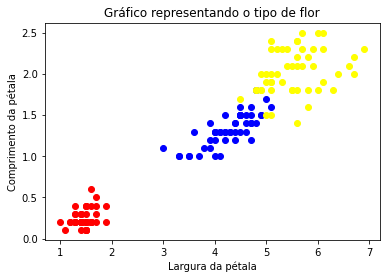

In [ ]:
# Preparando os dados
 
y = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None)
x = y.iloc[:, [2, 3]].values    #escolhe as caracteristicas das flores a ser utilizadas.
 
 
# criando um gráfico que representa por cores os tipos de flores
 
plt.scatter(x[:50, 0], x[:50, 1], color='red')              # iris-setosa
plt.scatter(x[50:100, 0], x[50:100, 1], color='blue')       # iris-versicolor
plt.scatter(x[100:150, 0], x[100:150, 1], color='yellow')   # iris-virginica
plt.title('Gráfico representando o tipo de flor')
plt.xlabel('Largura da pétala')
plt.ylabel('Comprimento da pétala')
plt.show()


Treinamento


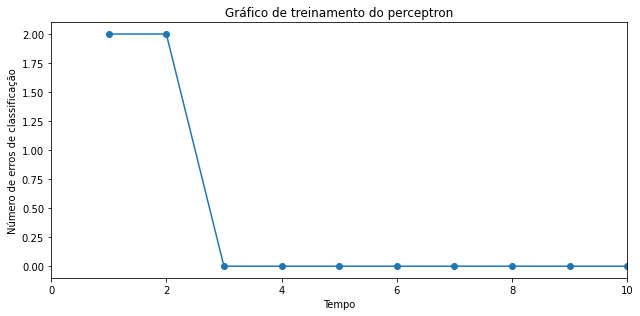

In [ ]:
# escolhendo o tipo de iris a ser usada
 
y = y.iloc[:, 4].values # Escolhe a coluna de nomes das flores
flor = 'Iris-setosa'    # Escolha entre: Iris-setosa, Iris-virginica, Iris-versicolor
y = np.where(y == flor, 1, 0)
 
print('\nTreinamento')
 
# Treinamento
Classifier = Perceptron(Learn_Rate=0.1, Iterations=100)
Classifier.fit(x, y)
fig, ax = plt.subplots(1,1, figsize = (9,4.5), tight_layout = True)
ax.plot(range(1, len(Classifier.errors) + 1), Classifier.errors, marker='o')
plt.title('Gráfico de treinamento do perceptron')
plt.xlabel('Tempo')
plt.ylabel('Número de erros de classificação')
ax.set_xlim(0,10) # O numerro de interações total é 100, mas escolhemos 10 pra melhor visualização.
plt.show()

In [ ]:
# Usando o Perceptron já treinado
 
perceptron = Perceptron(Learn_Rate=0.1, Iterations=100)
treino = perceptron.fit(x,y)

pred = perceptron.predict([[1.0,1.0]])

print(pred,end=' => ')
 
if pred == 1:
  print('É uma iris-setosa.')
else:
  print('Não é uma iris-setosa.')

[1] => É uma iris-setosa.


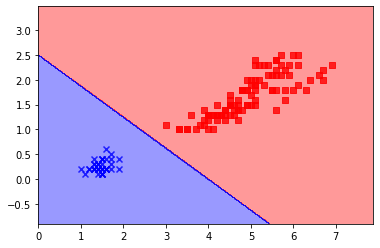

In [ ]:
# Entendendo a região em que houve o ajuste pelo perceptron

def plot_decision_regions(X, y, perceptron, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    #chama o perceptron usando predict. E define o contorno das regioes.
    Z = perceptron.predict(np.array([xx1.ravel(), xx2.ravel()]).T) #.ravel transforma em vetor 1D
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())


    # prepara o plot(scatter) separando por cor.
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],alpha=0.8, color =cmap(idx),marker=markers[idx], label=cl)

# Showing the final results of the perceptron model.
plot_decision_regions(x, y, perceptron=perceptron)
plt.show()

**3. Compare o resultado da sua classe com a classe Peceptron do módulo do scikit-learn `linear_model`.**

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron as Perceptron2

iris = load_iris() # returns a dictionary-like object
# características (features) das flores Iris:
#print(iris.target_names)    # target = label
#print(iris.feature_names)

# Pelo primeiro print acima, as features são: 0: sepal length, 1: sepal width, 2: petal length, 3: petal width
# Vamos selecionar somente as features petal length e petal width:
X = iris.data[:, [2,3]]
#print(x)# nos retorna um array com 150 conjuntos de inputs
#len(iris.data[:,(2,3)])
y = (iris.target == 0).astype(int)  # label = iris setosa. Retorna uma lista com os labels da Iris-Setosa. 0: não, 1: sim

perceptron_clf = Perceptron2()      # dois inputs: comprimento e largura da pétala
perceptron_clf.fit(X,y)            # Train

y_pred = perceptron_clf.predict([[1.0,1.0]])  # predict
print(y_pred,end=" => ")
if y_pred == 1:
  print('É uma iris-setosa.')
else:
  print('Não é uma iris-setosa.')

[1] => É uma iris-setosa.


*Ao colocarmos diversos valores para ambos os perceptrons vemos que o perceptron linear_model é um pouco mais preciso. Mas ambos predizem coerentemente bem para as caracteristicas das petalas apresentadas.*







**4. Você pode pensar em algum outro exemplo em que possa aplica o modelo do Perceptron? Quando esse modelo falha?**

*O Perceptron que constituído por uma base de Redes Neurais Básicas em diversas aplicações como, por exemplo: classificação de imagens, reconhecimento de fala, recomendação de vídeos no YouTube, tradução automática de software.*

*O modelo falha quando não podemos separar as variáveis com uma linha reta, quando as caracteristicas estão muito misturadas.*

**A pergunta que não quer calar:
Por que foi analizado apenas pelo tamanho e comprimento das pétalas e não por outras caracteristicas das flores???**

*Vamos então analisar os dados*

In [ ]:
# baixando os dados e olhando a tabela em DataFrame:

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
# download and convert the csv into a DataFrame
df = pd.read_csv(url)
df = df.rename(columns = {"5.1":"sepal length",'3.5':'sepal width ','1.4':'petal length','0.2':'petal width','Iris-setosa':'Iris'}) 
df.head()

,sepal length,sepal width,petal length,petal width,Iris
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


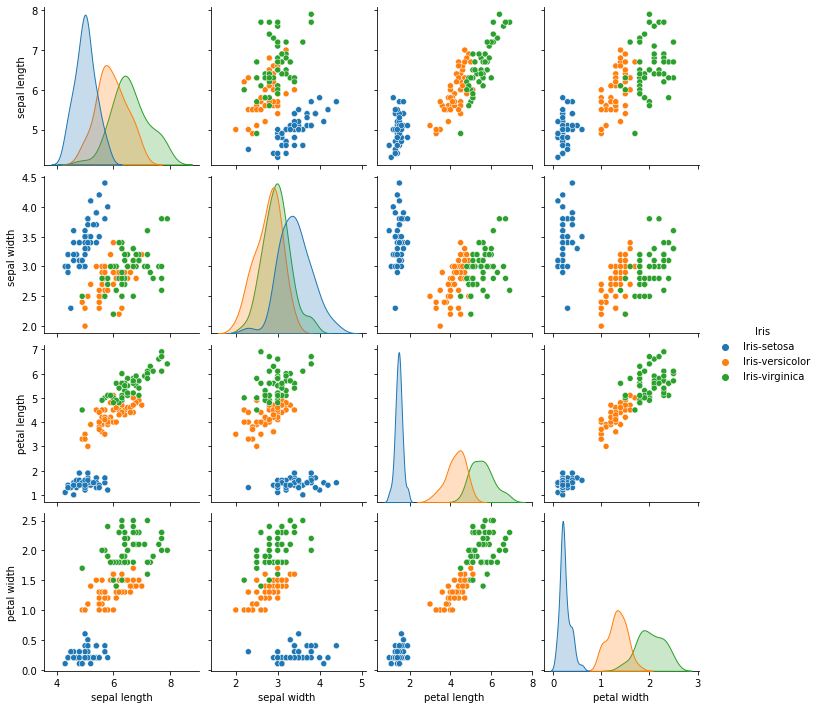

In [ ]:
# Olhando como fica o gráfico de distribuição para todas as combinações de colunas

sns.pairplot(df, hue='Iris')

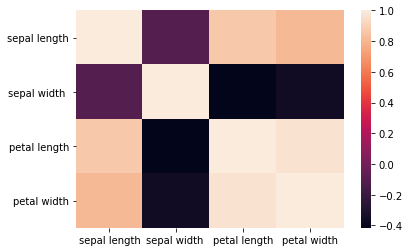

In [ ]:
# Heatmap para uma melhor visualização

sns.heatmap(df.corr())

*Como podemos observar (dados fora da diagonal): as melhores combinaçoes de dados sao as linhas mais claras que correspondem ao petal length e a petal width.*

**O que acontece se tentarmos com colunas/caracteristicas diferentes:**

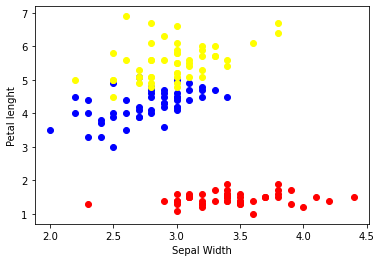

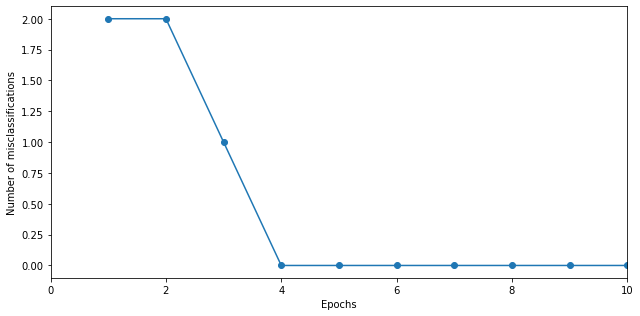

[0]


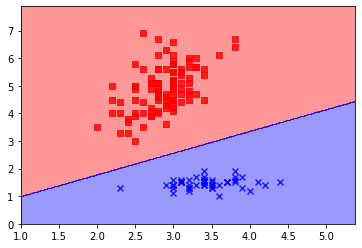

In [ ]:
# Data retrieval and preperation.
y = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None)
x = y.iloc[:, [1, 2]].values

plt.scatter(x[:50, 0], x[:50, 1], color='red')
plt.scatter(x[50:100, 0], x[50:100, 1], color='blue')
plt.scatter(x[100:150, 0], x[100:150, 1], color='yellow')
plt.xlabel('Sepal Width')
plt.ylabel('Petal lenght')
plt.show()

y = y.iloc[:, 4].values
flor = 'Iris-setosa'
y = np.where(y == flor, 1, 0)

# Model training and evaluation.
Classifier = Perceptron(Learn_Rate=0.01, Iterations=100)
Classifier.fit(x, y)
fig, ax = plt.subplots(1,1, figsize = (9,4.5), tight_layout = True)
ax.plot(range(1, len(Classifier.errors) + 1), Classifier.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
ax.set_xlim(0,10)
plt.show()

perceptron = Perceptron(Learn_Rate=0.01, Iterations=100)

treino = perceptron.fit(x,y)
pred = perceptron.predict([[1,3.5]])
print(pred)


# Defining function that plots the decision regions.
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'green', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, color=cmap(idx),
                    marker=markers[idx], label=cl)

# Showing the final results of the perceptron model.
plot_decision_regions(x, y, classifier=Classifier)
plt.show()

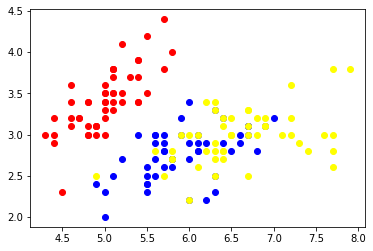

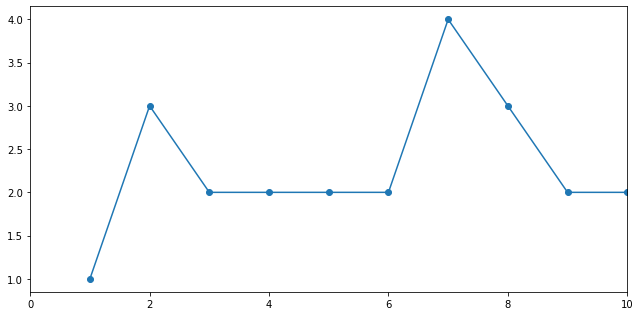

[0]


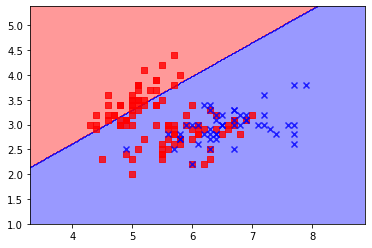

In [ ]:
# Vamos tentar encontrar a 'Iris-virginica'

# Data retrieval and preperation.
y = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None)
x = y.iloc[:, [0, 1]].values

#print(x)
plt.scatter(x[:50, 0], x[:50, 1], color='red')
plt.scatter(x[50:100, 0], x[50:100, 1], color='blue')
plt.scatter(x[100:150, 0], x[100:150, 1], color='yellow')
plt.show()

y = y.iloc[:, 4].values
flor = 'Iris-virginica'
y = np.where(y == flor, 1, 0)

# Model training and evaluation.
Classifier = Perceptron(Learn_Rate=0.01, Iterations=100)
Classifier.fit(x, y)
fig, ax = plt.subplots(1,1, figsize = (9,4.5), tight_layout = True)
ax.plot(range(1, len(Classifier.errors) + 1), Classifier.errors, marker='o')
#plt.xlabel('Epochs')
#plt.ylabel('Number of misclassifications')
ax.set_xlim(0,10)
plt.show()


perceptron = Perceptron(Learn_Rate=0.01, Iterations=100)
treino = perceptron.fit(x,y)
pred = perceptron.predict([[1,3.5]])
print(pred)

# Defining function that plots the decision regions.
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'green', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, color=cmap(idx),
                    marker=markers[idx], label=cl)

# Showing the final results of the perceptron model.
plot_decision_regions(x, y, classifier=Classifier)
plt.show()

*Como podemos observar, se caso escolhermos um tipo de flor que os dados estao muito misturados com as outras é impossivel, para esse perceptron, encontrar um padrão de reconhecimento*

# Backup

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap

In [ ]:

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
# download and convert the csv into a DataFrame
df = pd.read_csv(url)
df=df.rename(columns = {"5.1":"sepal length",'3.5':'sepal width ','1.4':'petal length','0.2':'petal width','Iris-setosa':'Iris'}) 
df.head()

,sepal length,sepal width,petal length,petal width,Iris
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  149 non-null    float64
 1   sepal width   149 non-null    float64
 2   petal length  149 non-null    float64
 3   petal width   149 non-null    float64
 4   Iris          149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


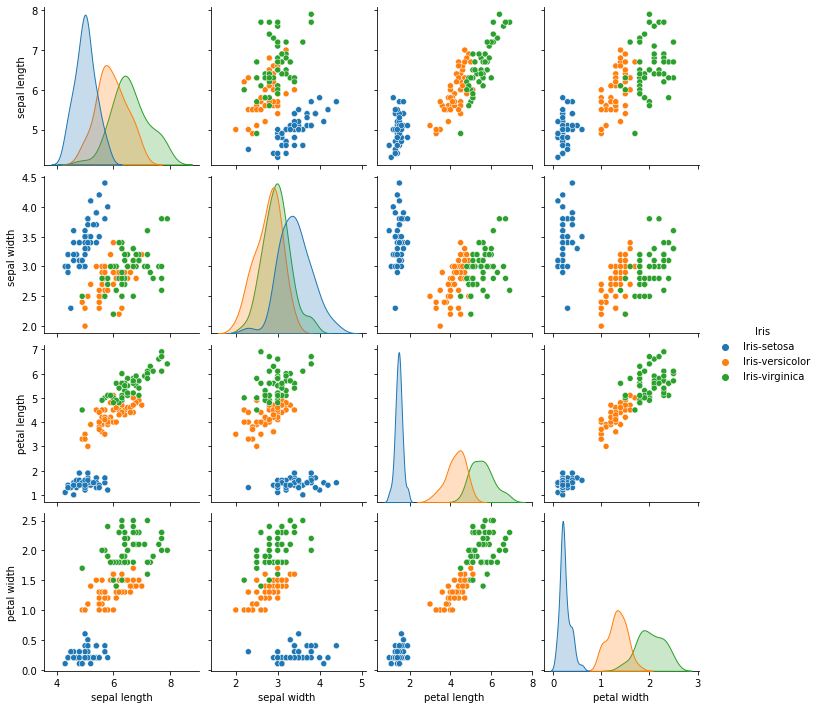

In [ ]:
sns.pairplot(df, hue='Iris')

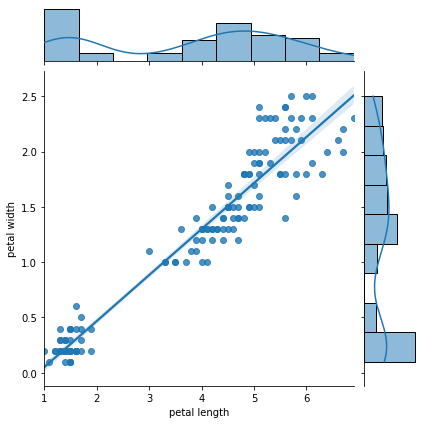

In [ ]:
sns.jointplot(x = 'petal length',y= 'petal width', data = df,kind = 'reg')

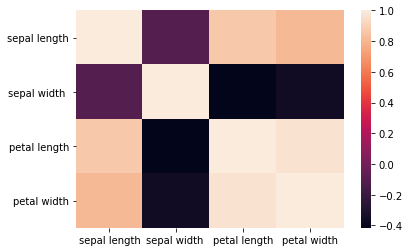

In [ ]:
sns.heatmap(df.corr())

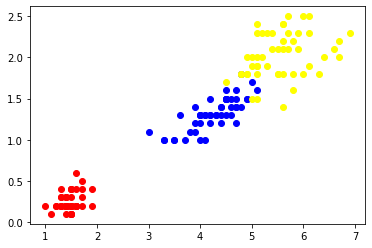

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


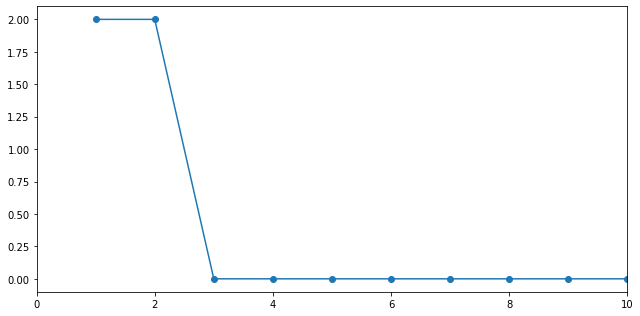

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


[0]


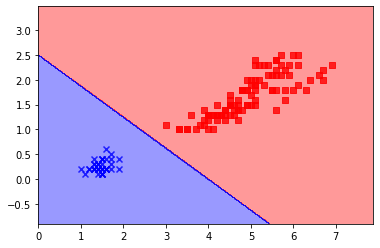

In [ ]:


# Creation of the main perceptron object.
class Perceptron(object):
    #Initiating the learning rate and number of iterations.
    def __init__(self, Learn_Rate=0.01, Iterations=100):
        self.learn_rate = Learn_Rate
        self.Iterations = Iterations
        self.errors = []
        self.weights = np.zeros(1 + x.shape[1])
    
    # Defining fit method for model training.
    def fit(self, x, y):
        self.weights = np.zeros(1 + x.shape[1])
        for i in range(self.Iterations):
            error = 0
            for xi, target in zip(x, y):
                update = self.learn_rate*(target - self.predict(xi))
                self.weights[1:] += update*xi
                self.weights[0] += update
                error += int(update != 0)
            self.errors.append(error)
        return self
    
    # Net Input method for summing the given matrix inputs and their corresponding weights.
    def net_input(self, x):
        return np.dot(x, self.weights[1:]) + self.weights[0]
    
    # Predict method for predicting the classification of data inputs.
    def predict(self, x):
        return np.where(self.net_input(x) > 0.0, 1, 0)

# Data retrieval and preperation.
y = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None)
x = y.iloc[:, [2, 3]].values
#print(x)
plt.scatter(x[:50, 0], x[:50, 1], color='red')
plt.scatter(x[50:100, 0], x[50:100, 1], color='blue')
plt.scatter(x[100:150, 0], x[100:150, 1], color='yellow')
plt.show()
y = y.iloc[:, 4].values
y = np.where(y == 'Iris-setosa', 1, 0)
print(y)
# Model training and evaluation.
Classifier = Perceptron(Learn_Rate=0.5, Iterations=100)
Classifier.fit(x, y)
fig, ax = plt.subplots(1,1, figsize = (9,4.5), tight_layout = True)
ax.plot(range(1, len(Classifier.errors) + 1), Classifier.errors, marker='o')
#ax.xlabel('Epochs')
#ax.ylabel('Number of misclassifications')
ax.set_xlim(0,10)
plt.show()
perceptron = Perceptron(Learn_Rate=0.5, Iterations=100)


treino = perceptron.fit(x,y)
pred = perceptron.predict([[2.5,1.0]])
print(pred)



# Defining function that plots the decision regions.
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

# Showing the final results of the perceptron model.
plot_decision_regions(x, y, classifier=Classifier)
plt.show()


In [ ]:

import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris() # returns a dictionary-like object
# características (features) das flores Iris:
print(iris.target_names)    # target = label
print(iris.feature_names)

# Pelo primeiro print acima, as features são: 0: sepal length, 1: sepal width, 2: petal length, 3: petal width
# Vamos selecionar somente as features petal length e petal width:
X = iris.data[:, [2,3]]
#print(x)# nos retorna um array com 150 conjuntos de inputs
#len(iris.data[:,(2,3)])
y = (iris.target == 0).astype(int)  # label = iris setosa. Retorna uma lista com os labels da Iris-Setosa. 0: não, 1: sim

perceptron_clf = Perceptron()      # dois inputs: comprimento e largura da pétala
perceptron_clf.fit(X,y)            # Train

y_pred = perceptron_clf.predict([[2.5,1.0]])  # predict
print(y_pred)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0]


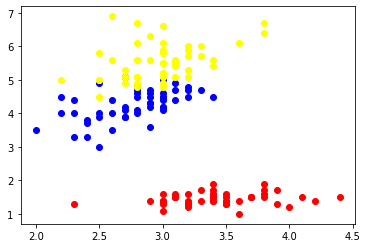

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
[0]


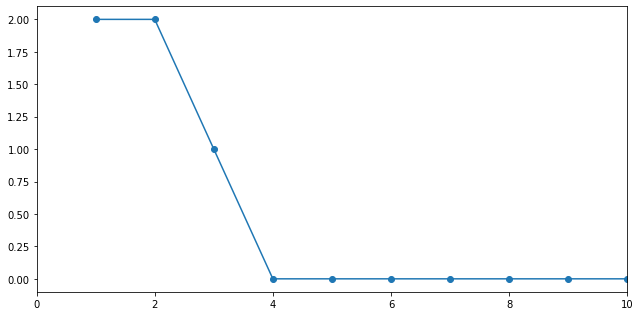

In [ ]:
# Creation of the main perceptron object.
class Perceptron(object):
    #Initiating the learning rate and number of iterations.
    def __init__(self, Learn_Rate=0.01, Iterations=100):
        self.learn_rate = Learn_Rate
        self.Iterations = Iterations
        self.errors = []
        self.weights = np.zeros(1 + x.shape[1])
    
    # Defining fit method for model training.
    def fit(self, x, y):
        self.weights = np.zeros(1 + x.shape[1])
        for i in range(self.Iterations):
            error = 0
            for xi, target in zip(x, y):
                update = self.learn_rate * (target - self.predict(xi))
                self.weights[1:] += update*xi
                self.weights[0] += update
                error += int(update != 0)
            self.errors.append(error)
        return self
    
    # Net Input method for summing the given matrix inputs and their corresponding weights.
    def net_input(self, x):
        return np.dot(x, self.weights[1:]) + self.weights[0]
    
    # Predict method for predicting the classification of data inputs.
    def predict(self, x):
        return np.where(self.net_input(x) > 0.0, 1, 0)

# Data retrieval and preperation.
y = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None)
x = y.iloc[:, [1, 2]].values
#print(x)
plt.scatter(x[:50, 0], x[:50, 1], color='red')
plt.scatter(x[50:100, 0], x[50:100, 1], color='blue')
plt.scatter(x[100:150, 0], x[100:150, 1], color='yellow')
plt.show()
y = y.iloc[:, 4].values
y = np.where(y == 'Iris-setosa', 1, 0)
print(y)
# Model training and evaluation.
Classifier = Perceptron(Learn_Rate=0.01, Iterations=100)
Classifier.fit(x, y)
fig, ax = plt.subplots(1,1, figsize = (9,4.5), tight_layout = True)
ax.plot(range(1, len(Classifier.errors) + 1), Classifier.errors, marker='o')
#plt.xlabel('Epochs')
#plt.ylabel('Number of misclassifications')
ax.set_xlim(0,10)

perceptron = Perceptron(Learn_Rate=0.01, Iterations=100)


treino = perceptron.fit(x,y)
pred = perceptron.predict([[1,3.5]])
print(pred)


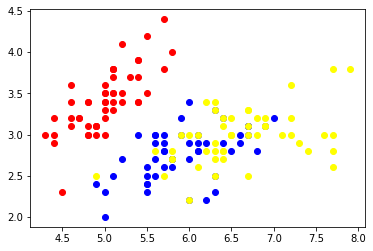

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


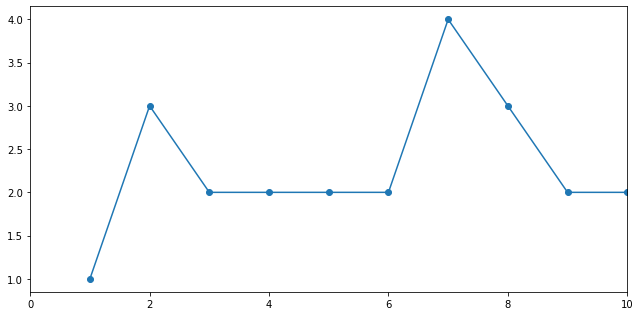

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


[0]


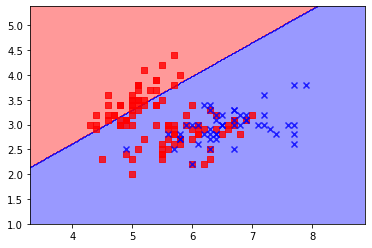

In [ ]:
# Creation of the main perceptron object.
class Perceptron(object):
    #Initiating the learning rate and number of iterations.
    def __init__(self, Learn_Rate=0.01, Iterations=100):
        self.learn_rate = Learn_Rate
        self.Iterations = Iterations
        self.errors = []
        self.weights = np.zeros(1 + x.shape[1])
    
    # Defining fit method for model training.
    def fit(self, x, y):
        self.weights = np.zeros(1 + x.shape[1])
        for i in range(self.Iterations):
            error = 0
            for xi, target in zip(x, y):
                update = self.learn_rate * (target - self.predict(xi))
                self.weights[1:] += update*xi
                self.weights[0] += update
                error += int(update != 0)
            self.errors.append(error)
        return self
    
    # Net Input method for summing the given matrix inputs and their corresponding weights.
    def net_input(self, x):
        return np.dot(x, self.weights[1:]) + self.weights[0]
    
    # Predict method for predicting the classification of data inputs.
    def predict(self, x):
        return np.where(self.net_input(x) > 0.0, 1, 0)

# Data retrieval and preperation.
y = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None)
x = y.iloc[:, [0, 1]].values
#print(x)
plt.scatter(x[:50, 0], x[:50, 1], color='red')
plt.scatter(x[50:100, 0], x[50:100, 1], color='blue')
plt.scatter(x[100:150, 0], x[100:150, 1], color='yellow')
plt.show()
y = y.iloc[:, 4].values
y = np.where(y == 'Iris-virginica', 1, 0)
print(y)
# Model training and evaluation.
Classifier = Perceptron(Learn_Rate=0.01, Iterations=100)
Classifier.fit(x, y)
fig, ax = plt.subplots(1,1, figsize = (9,4.5), tight_layout = True)
ax.plot(range(1, len(Classifier.errors) + 1), Classifier.errors, marker='o')
#plt.xlabel('Epochs')
#plt.ylabel('Number of misclassifications')
ax.set_xlim(0,10)
plt.show()
perceptron = Perceptron(Learn_Rate=0.01, Iterations=100)


treino = perceptron.fit(x,y)
pred = perceptron.predict([[1,3.5]])
print(pred)

# Defining function that plots the decision regions.
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'green', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

# Showing the final results of the perceptron model.
plot_decision_regions(x, y, classifier=Classifier)
plt.show()